# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
print(hospital_read_df)

                                           Hospital Name  Provider Number  \
0                   FROEDTERT MEMORIAL LUTHERAN HOSPITAL           520177   
1                                    PROVIDENCE HOSPITAL            90006   
2                      BEAUFORT COUNTY MEMORIAL HOSPITAL           420067   
3              ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER           140208   
4                      BRAZOSPORT REGIONAL HEALTH SYSTEM           450072   
5                        WESTERN MISSOURI MEDICAL CENTER           260097   
6                                   SAINT AGNES HOSPITAL           210011   
7                               MERCY HOSPITAL JEFFERSON           260023   
8                               ONSLOW MEMORIAL HOSPITAL           340042   
9                                      FAUQUIER HOSPITAL           490023   
10     ROBERT WOOD JOHNSON UNIVERSITY HOSPITAL AT RAHWAY           310024   
11                                MERCY ST ANNE HOSPITAL           360262   

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/Gary/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


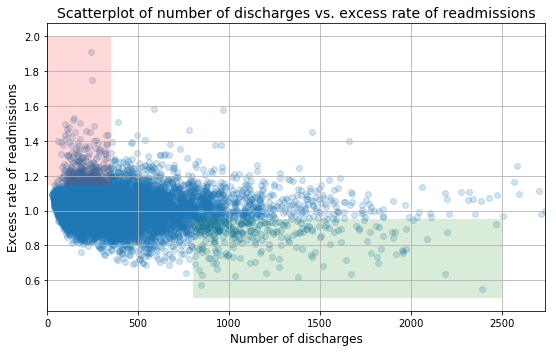

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

# A. Do you agree with the above analysis and recommendations? Why or why not?

I do not agree.
While the above analysis and recommendations give a inverse proportionate relation between the number discharges and readmission rates, there was no statistical test or hypothesis test done to prove that the data was handled with having a certain capacity of hospital. This analysis is inconsistent and require further statistical analysis to prove its significance for analysis that was done on a population than sample testing.

# B. Provide support for your arguments and your own recommendations with a statistically sound analysis:
Setup an appropriate hypothesis test.

Ho: Null hypothesis states that there is no correlation between the number of discharges and readmission rates

H1 The alternative hypothesis will state that Null hypothesis states that there is correlation between the number of discharges and readmission rates.

Compute and report the observed significance value (or p-value).

In [5]:
# finding out the statistical data for the ratio of excess readmission
hospital_read_df['Excess Readmission Ratio'].describe()

count    13731.000000
mean         1.002582
std          0.091088
min          0.549500
25%          0.949500
50%          0.997100
75%          1.052350
max          1.909500
Name: Excess Readmission Ratio, dtype: float64

In [6]:
hospital_read_df.isnull().sum() #checking for missing data, Readmission ratio has 3129

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      13731
Excess Readmission Ratio       3129
Predicted Readmission Rate     3129
Expected Readmission Rate      3129
Number of Readmissions         5363
Start Date                        0
End Date                          0
dtype: int64

In [7]:
hospital_read_df['Excess Readmission Ratio'][hospital_read_df['Number of Discharges'] == 'Not Available'].describe()

count    2234.000000
mean        0.977254
std         0.081908
min         0.629900
25%         0.937050
50%         0.974600
75%         1.016075
max         1.328700
Name: Excess Readmission Ratio, dtype: float64

We want to be able to work on data without the missing data.

In [8]:
#Filtering off the rows that number of discharges is not available
no_missing=hospital_read_df[hospital_read_df['Number of Discharges']!='Not Available']
no_missing=no_missing[no_missing['Number of Readmissions'].notnull()]
no_missing.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [9]:
from matplotlib import rcParams
import scipy.stats as stats
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

no_missing['Number of Discharges']=pd.to_numeric(no_missing['Number of Discharges'])
#check again for missing values
no_missing.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio          0
Predicted Readmission Rate        0
Expected Readmission Rate         0
Number of Readmissions            0
Start Date                        0
End Date                          0
dtype: int64

In [10]:
#Footnote missing is ok, now we need to find correlation between the number of discharges and excess readmission ratio
no_missing.corr()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
Provider Number,1.000000,-0.008849,NaN,-0.012112,-0.009049,-0.003710,-0.009099
Number of Discharges,-0.008849,1.000000,NaN,-0.097398,-0.135163,-0.131091,0.791272
Footnote,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Excess Readmission Ratio,-0.012112,-0.097398,NaN,1.000000,0.200039,-0.031104,0.117600
Predicted Readmission Rate,-0.009049,-0.135163,NaN,0.200039,1.000000,0.965420,0.361033
Expected Readmission Rate,-0.003710,-0.131091,NaN,-0.031104,0.965420,1.000000,0.330527
Number of Readmissions,-0.009099,0.791272,NaN,0.117600,0.361033,0.330527,1.000000


In [11]:
# the value -0.097398 has appeared to be correlated
corr= -0.097398
pop= 11497


The total data is 11497 rows, and negative correlation is shown by the result above so, when the number of discharges increase, the discharges does not increase drastically, but rather slowly

# Calculating the p value using t test

In [12]:
tval=(corr*((pop-2)/(1-corr**2))**0.5)
p_value1 = stats.t.sf(np.abs(tval), (pop-2))*2  # two-sided pvalue = Prob(abs(t)>tt)
p_value1

1.2224686234119185e-25

For p value < 0.05, the null hypothesis is rejected and hence the altenative hypothesis is true for that there is correlation between the number of discharges and readmission rates. 

# Report statistical significance for  α= .01.

there will be no statistical difference for the pvalue for the mentioned α value and α= .05 as the calculation does not include α.

# Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Statistical significance takes into account the value achieved by sampling computation from a small error to a big one depending on the sample size, like the sample size for this case. Besides, practical significance discusses the case towards application in reality. The difference in the two terms are on the correlation. Statistically this can be proven, the recommendation I would give to the client is to hire an analyst to observed and compute the dataset to understand the confirmation for the correlation of the number of discharges and excess readmission ratio.

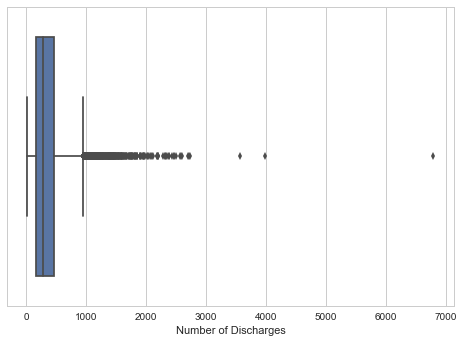

In [13]:

import seaborn as sns
sns.set_style("whitegrid")
ax = sns.boxplot(x=no_missing['Number of Discharges'])


In [14]:
#now for the ratio of the excess readmission, we can categorize them into two groupsof hospitals, low and high readmission.
low_readmission=no_missing[no_missing['Excess Readmission Ratio']<=1]
high_readmission=no_missing[no_missing['Excess Readmission Ratio']>1]

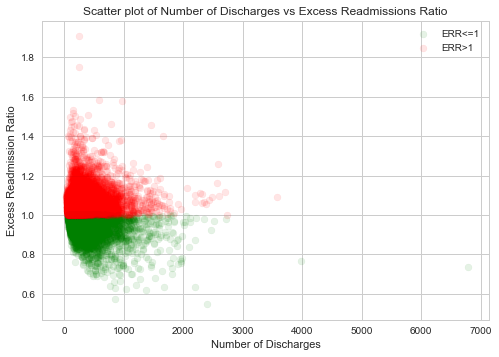

In [15]:
plt.scatter(low_readmission['Number of Discharges'], low_readmission['Excess Readmission Ratio'], c='g', label="ERR<=1", alpha=0.10)
plt.scatter(high_readmission['Number of Discharges'], high_readmission['Excess Readmission Ratio'], c='r', label='ERR>1', alpha=0.1)
plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.title('Scatter plot of Number of Discharges vs Excess Readmissions Ratio')
plt.legend()

# Look at the scatterplot above.
What are the advantages and disadvantages of using this plot to convey information?
Construct another plot that conveys the same information in a more direct manner.

The pros of the plot is that for the points shown in the scatter plots, it has clear grid it falls under, the cons is that it is hard to tell where the boundary between both low and high readmission lies although there the plots are of different colors. Below will show a plot with a trendline that cuts in between the two variables

In [16]:
from scipy import stats  
x=no_missing['Number of Discharges']
y=no_missing['Excess Readmission Ratio']
slope, yintercept, rval, pval, std_err = stats.linregress(x,y)

In [18]:
print(slope, yintercept, rval, pval, std_err)

(-2.9010517330570697e-05, 1.018106147373357, -0.097397943510793519, 1.2225473776734486e-25, 2.7649127349110583e-06)


In [19]:
X=no_missing['Number of Discharges'].sort_values()
trendline=(-2.901e-05)*X + 1.02

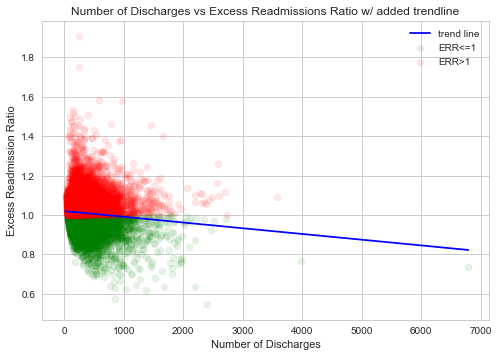

In [20]:
plt.scatter(low_readmission['Number of Discharges'], low_readmission['Excess Readmission Ratio'], c='g', label="ERR<=1", alpha=0.10)
plt.scatter(high_readmission['Number of Discharges'], high_readmission['Excess Readmission Ratio'], c='r', label='ERR>1', alpha=0.1)
plt.plot(X, trendline, c='b', label='trend line')

plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.title('Number of Discharges vs Excess Readmissions Ratio w/ added trendline')
plt.legend()